Monte Carlo Simulation Results
---------------------------------
Initial Investment: $50,000.00
Time Horizon: 5 periods
Number of Simulations: 5000

Final Value Statistics:
Mean Final Value: $88,168.24
Median Final Value: $83,111.67
Standard Deviation: $36,178.28
5th Percentile: $39,517.61
95th Percentile: $156,561.65


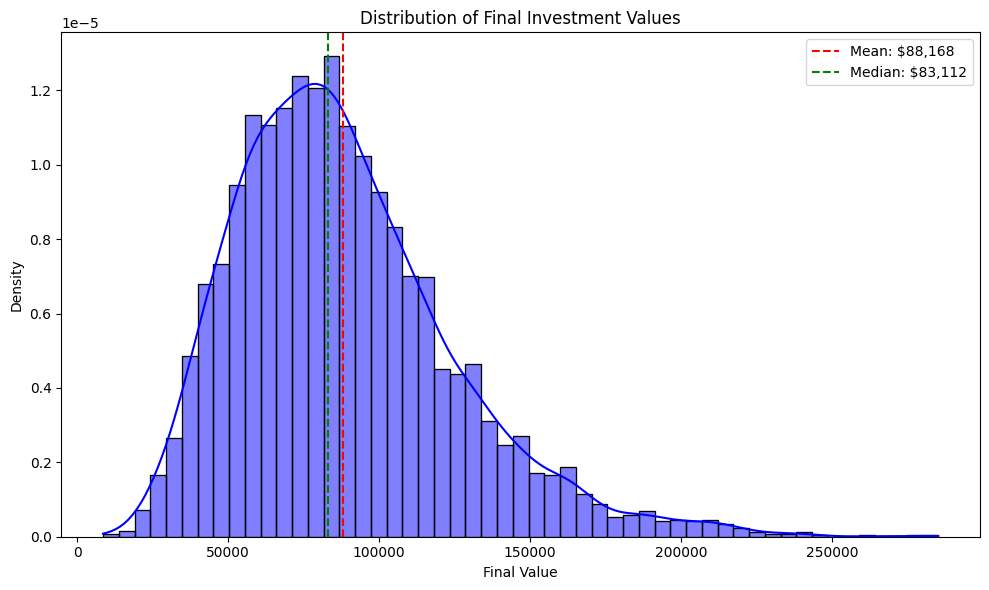

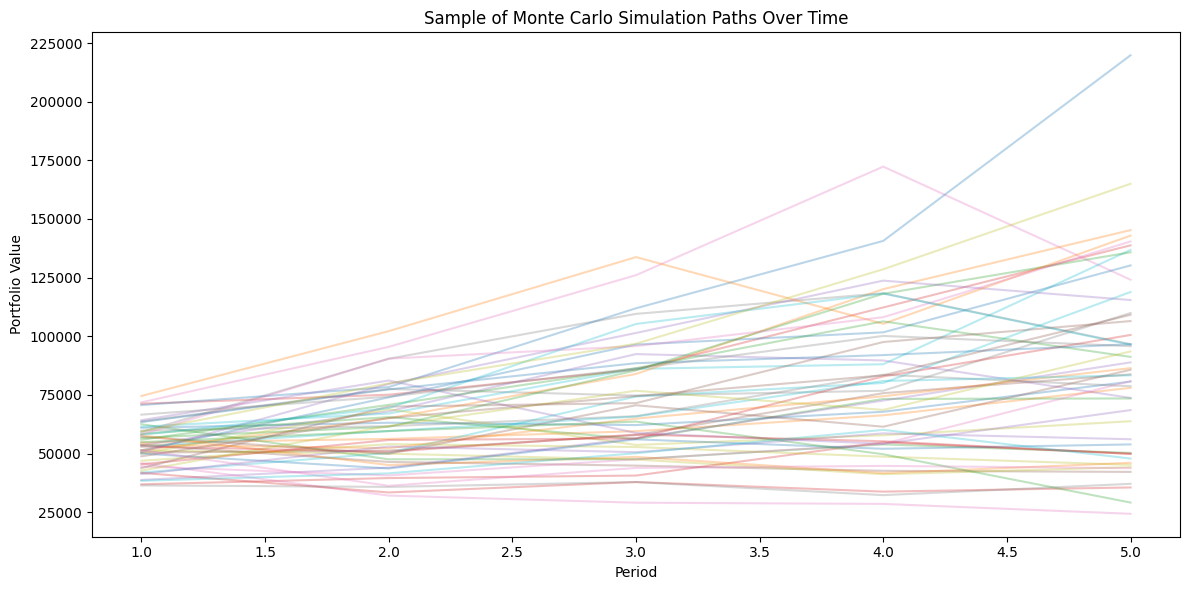

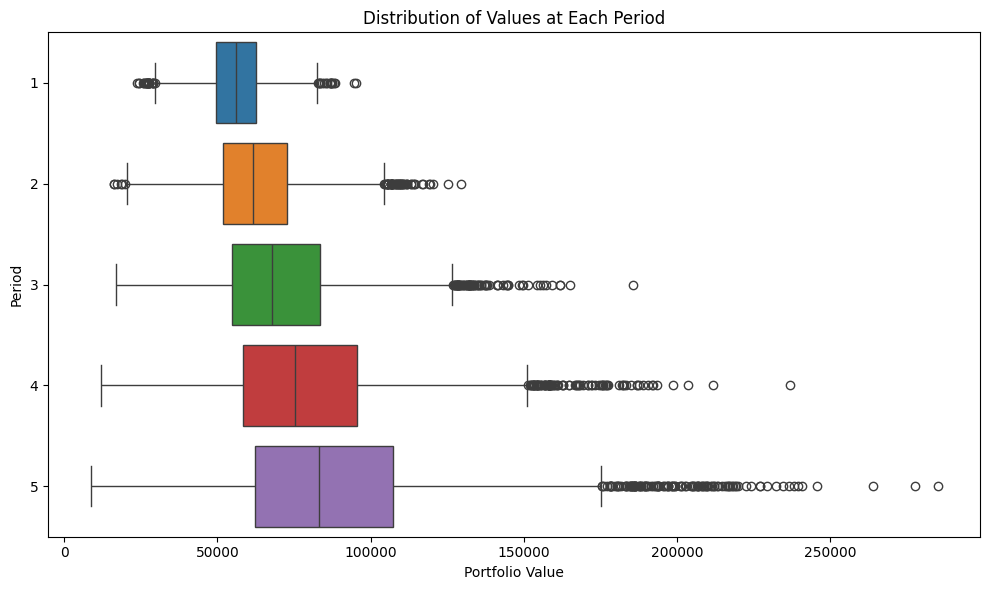

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def monte_carlo_simulation(
    initial_investment=100000,
    expected_return=0.10,    # 10% average return per period
    return_std=0.15,        # 15% standard deviation of returns per period
    time_horizon=10,        # Number of periods (e.g. years)
    num_simulations=10000,  # Number of Monte Carlo simulations
    seed=None
):
    """
    Run a Monte Carlo simulation for the return on investment given certain assumptions.

    Parameters
    ----------
    initial_investment : float
        The initial amount invested.
    expected_return : float
        The expected return per period, expressed as a decimal. For example, 0.1 for 10%.
    return_std : float
        The standard deviation of returns per period, expressed as a decimal. For example, 0.15 for 15%.
    time_horizon : int
        The number of periods (e.g. years) to simulate.
    num_simulations : int
        The number of simulation paths to generate.
    seed : int, optional
        A random seed for reproducibility.

    Returns
    -------
    results_df : pd.DataFrame
        A dataframe where each column is one simulation and each row is the investment value at a given period.
    final_values : np.ndarray
        An array of the final investment values for all simulations.
    """
    if seed is not None:
        np.random.seed(seed)

    # Generate random returns for each simulation and each period
    # Shape: (time_horizon, num_simulations)
    random_returns = np.random.normal(loc=expected_return, scale=return_std,
                                      size=(time_horizon, num_simulations))

    # Calculate the investment value for each simulation over time
    # Start with initial investment and grow it period by period
    # Value at time t = Value at time t-1 * (1 + return_t)
    investment_paths = initial_investment * np.cumprod(1 + random_returns, axis=0)

    # Convert to a DataFrame for convenience
    results_df = pd.DataFrame(investment_paths,
                              index=range(1, time_horizon+1),
                              columns=[f"Simulation_{i+1}" for i in range(num_simulations)])

    final_values = results_df.iloc[-1].values
    return results_df, final_values


if __name__ == "__main__":
    # Example usage
    initial_investment = 50000
    expected_return = 0.12
    return_std = 0.20
    time_horizon = 5
    num_simulations = 5000

    results_df, final_values = monte_carlo_simulation(
        initial_investment=initial_investment,
        expected_return=expected_return,
        return_std=return_std,
        time_horizon=time_horizon,
        num_simulations=num_simulations,
        seed=42
    )

    # Basic Statistics
    mean_final = np.mean(final_values)
    median_final = np.median(final_values)
    std_final = np.std(final_values)
    percentile_5 = np.percentile(final_values, 5)
    percentile_95 = np.percentile(final_values, 95)

    print("Monte Carlo Simulation Results")
    print("---------------------------------")
    print(f"Initial Investment: ${initial_investment:,.2f}")
    print(f"Time Horizon: {time_horizon} periods")
    print(f"Number of Simulations: {num_simulations}")
    print()
    print("Final Value Statistics:")
    print(f"Mean Final Value: ${mean_final:,.2f}")
    print(f"Median Final Value: ${median_final:,.2f}")
    print(f"Standard Deviation: ${std_final:,.2f}")
    print(f"5th Percentile: ${percentile_5:,.2f}")
    print(f"95th Percentile: ${percentile_95:,.2f}")

    # Visualization 1: Distribution of final values
    plt.figure(figsize=(10, 6))
    sns.histplot(final_values, kde=True, color='blue', stat="density")
    plt.title("Distribution of Final Investment Values")
    plt.xlabel("Final Value")
    plt.ylabel("Density")
    plt.axvline(x=mean_final, color='r', linestyle='--', label=f'Mean: ${mean_final:,.0f}')
    plt.axvline(x=median_final, color='g', linestyle='--', label=f'Median: ${median_final:,.0f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Visualization 2: Random subset of simulation paths over time
    subset_size = min(50, num_simulations)
    plt.figure(figsize=(12, 6))
    plt.plot(results_df.iloc[:, :subset_size], alpha=0.3)
    plt.title("Sample of Monte Carlo Simulation Paths Over Time")
    plt.xlabel("Period")
    plt.ylabel("Portfolio Value")
    plt.tight_layout()
    plt.show()

    # Visualization 3: Boxplot of values at each period
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=results_df.T, orient='h')
    plt.title("Distribution of Values at Each Period")
    plt.xlabel("Portfolio Value")
    plt.ylabel("Period")
    plt.tight_layout()
    plt.show()


In [ ]:
pip install dash plotly pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [ ]:
import numpy as np
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import plotly.express as px

def monte_carlo_simulation(
    initial_investment=100000,
    expected_return=0.10,
    return_std=0.15,
    time_horizon=10,
    num_simulations=10000,
    seed=None
):
    if seed is not None:
        np.random.seed(seed)

    # Generate random returns
    random_returns = np.random.normal(loc=expected_return, scale=return_std,
                                      size=(time_horizon, num_simulations))

    # Calculate investment paths
    investment_paths = initial_investment * np.cumprod(1 + random_returns, axis=0)

    results_df = pd.DataFrame(investment_paths,
                              index=range(1, time_horizon+1),
                              columns=[f"Simulation_{i+1}" for i in range(num_simulations)])
    final_values = results_df.iloc[-1].values
    return results_df, final_values

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Monte Carlo Investment Simulator"),
    html.Div([
        html.Div([
            html.Label("Initial Investment:"),
            dcc.Input(id='initial_investment', type='number', value=50000, step=1000),
        ], style={'padding': '10px', 'display': 'inline-block'}),

        html.Div([
            html.Label("Expected Return (decimal):"),
            dcc.Input(id='expected_return', type='number', value=0.12, step=0.01),
        ], style={'padding': '10px', 'display': 'inline-block'}),

        html.Div([
            html.Label("Return Std. Dev. (decimal):"),
            dcc.Input(id='return_std', type='number', value=0.20, step=0.01),
        ], style={'padding': '10px', 'display': 'inline-block'}),

        html.Div([
            html.Label("Time Horizon (periods):"),
            dcc.Input(id='time_horizon', type='number', value=5, step=1),
        ], style={'padding': '10px', 'display': 'inline-block'}),

        html.Div([
            html.Label("Number of Simulations:"),
            dcc.Input(id='num_simulations', type='number', value=2000, step=1000),
        ], style={'padding': '10px', 'display': 'inline-block'}),

        html.Div([
            html.Label("Random Seed (optional):"),
            dcc.Input(id='seed', type='number', value=42, step=1),
        ], style={'padding': '10px', 'display': 'inline-block'})
    ]),
    html.Hr(),

    # Statistics
    html.Div(id='stats-output', style={'margin': '20px 0'}),

    # Graphs
    html.Div([
        html.H3("Distribution of Final Investment Values"),
        dcc.Graph(id='final-distribution-graph'),
    ]),

    html.Div([
        html.H3("Sample of Simulation Paths"),
        dcc.Graph(id='simulation-paths-graph'),
    ]),

    html.Div([
        html.H3("Distribution of Values at Each Period"),
        dcc.Graph(id='boxplot-graph'),
    ])
], style={'width': '80%', 'margin': 'auto'})

@app.callback(
    [Output('stats-output', 'children'),
     Output('final-distribution-graph', 'figure'),
     Output('simulation-paths-graph', 'figure'),
     Output('boxplot-graph', 'figure')],
    [Input('initial_investment', 'value'),
     Input('expected_return', 'value'),
     Input('return_std', 'value'),
     Input('time_horizon', 'value'),
     Input('num_simulations', 'value'),
     Input('seed', 'value')]
)
def update_simulation(initial_investment, expected_return, return_std, time_horizon, num_simulations, seed):
    if None in (initial_investment, expected_return, return_std, time_horizon, num_simulations):
        return ["Please provide all inputs.", {}, {}, {}]

    results_df, final_values = monte_carlo_simulation(
        initial_investment=initial_investment,
        expected_return=expected_return,
        return_std=return_std,
        time_horizon=time_horizon,
        num_simulations=num_simulations,
        seed=seed
    )

    mean_final = np.mean(final_values)
    median_final = np.median(final_values)
    std_final = np.std(final_values)
    percentile_5 = np.percentile(final_values, 5)
    percentile_95 = np.percentile(final_values, 95)

    # Stats display
    stats = html.Div([
        html.H3("Final Value Statistics"),
        html.P(f"Mean Final Value: ${mean_final:,.2f}"),
        html.P(f"Median Final Value: ${median_final:,.2f}"),
        html.P(f"Standard Deviation: ${std_final:,.2f}"),
        html.P(f"5th Percentile: ${percentile_5:,.2f}"),
        html.P(f"95th Percentile: ${percentile_95:,.2f}")
    ])

    # Distribution of final values - using a histogram
    fig_dist = px.histogram(final_values, nbins=50, marginal="rug", opacity=0.75)
    fig_dist.update_layout(
        title="Distribution of Final Investment Values",
        xaxis_title="Final Value",
        yaxis_title="Count"
    )
    fig_dist.add_vline(x=mean_final, line_dash='dash', line_color='red',
                       annotation_text=f"Mean: ${mean_final:,.0f}", annotation_position="top right")
    fig_dist.add_vline(x=median_final, line_dash='dash', line_color='green',
                       annotation_text=f"Median: ${median_final:,.0f}", annotation_position="bottom left")

    # Simulation paths (just a subset to avoid clutter)
    subset_size = min(50, num_simulations)
    fig_paths = go.Figure()
    for col in results_df.columns[:subset_size]:
        fig_paths.add_trace(go.Scatter(x=results_df.index, y=results_df[col],
                                       mode='lines', line=dict(width=1), opacity=0.4,
                                       showlegend=False))
    fig_paths.update_layout(
        title="Sample of Monte Carlo Simulation Paths Over Time",
        xaxis_title="Period",
        yaxis_title="Portfolio Value"
    )

    # Boxplot by period
    # Transpose results so each period is a column in a long format
    long_df = results_df.stack().reset_index()
    long_df.columns = ["Period", "Simulation", "Value"]
    fig_box = px.box(long_df, x="Value", y="Period", orientation="h")
    fig_box.update_layout(
        title="Distribution of Values at Each Period",
        xaxis_title="Portfolio Value",
        yaxis_title="Period"
    )

    return stats, fig_dist, fig_paths, fig_box

if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'